# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Results-concerning-$\langle-S_\lambda(z),-z-\rangle$" data-toc-modified-id="Results-concerning-$\langle-S_\lambda(z),-z-\rangle$-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Results concerning <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x27E8;</mo><msub><mi>S</mi><mi>&amp;#x03BB;</mi></msub><mo stretchy=&quot;false&quot;>(</mo><mi>z</mi><mo stretchy=&quot;false&quot;>)</mo><mo>,</mo><mi>z</mi><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x27E9;</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-6" style="width: 4.32em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.6em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.669em 1003.52em 2.843em -999.998em); top: -2.498em; left: 0em;"><span class="mrow" id="MathJax-Span-7"><span class="mo" id="MathJax-Span-8" style="font-family: STIXMathJax_Main;">⟨</span><span class="msubsup" id="MathJax-Span-9"><span style="display: inline-block; position: relative; width: 0.911em; height: 0px;"><span style="position: absolute; clip: rect(3.222em 1000.49em 4.131em -999.998em); top: -4.013em; left: 0em;"><span class="mi" id="MathJax-Span-10" style="font-family: STIXMathJax_Main-italic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span><span style="position: absolute; top: -3.862em; left: 0.494em;"><span class="mi" id="MathJax-Span-11" style="font-size: 70.7%; font-family: STIXMathJax_Main-italic;">λ</span><span style="display: inline-block; width: 0px; height: 4.017em;"></span></span></span></span><span class="mo" id="MathJax-Span-12" style="font-family: STIXMathJax_Main;">(</span><span class="mi" id="MathJax-Span-13" style="font-family: STIXMathJax_Main-italic;">z</span><span class="mo" id="MathJax-Span-14" style="font-family: STIXMathJax_Main;">)</span><span class="mo" id="MathJax-Span-15" style="font-family: STIXMathJax_Main;">,</span><span class="mi" id="MathJax-Span-16" style="font-family: STIXMathJax_Main-italic; padding-left: 0.191em;">z</span><span class="mo" id="MathJax-Span-17" style="font-family: STIXMathJax_Main;">⟩</span></span><span style="display: inline-block; width: 0px; height: 2.502em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.316em; border-left: 0px solid; width: 0px; height: 1.184em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo fence="false" stretchy="false">⟨</mo><msub><mi>S</mi><mi>λ</mi></msub><mo stretchy="false">(</mo><mi>z</mi><mo stretchy="false">)</mo><mo>,</mo><mi>z</mi><mo fence="false" stretchy="false">⟩</mo></math></span></span><script type="math/tex" id="MathJax-Element-2">\langle S_\lambda(z), z \rangle</script></a></div>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm

In [3]:
import pdmse

trying alternative import for spgl1...success!


In [4]:
def MeanAndVar(vector):
    return (vector.mean(), vector.var())

In [25]:
def ExpectationOfThresholdProduct(lam, n, k=1000, th=None):
    if th is None:
        th = np.sqrt(n)
    z = np.random.randn(n,k)
    Sz = pdmse.softThresh(z, lam)
    return MeanAndVar(np.einsum('i...,i...', Sz, z))

In [27]:
def UpperExpectationOfThresholdProduct(lam, n, k=1000, th=None, maxIter=None):
    if th is None:
        th = np.sqrt(n)
    if maxIter is None:
        maxIter = k*50
    j = 0
    col = 0
    z = np.zeros((n,k))
    while (col < k) and (j < maxIter):
        Z = np.random.randn(n)
        if np.dot(pdmse.softThresh(Z, lam), Z) >= th:
            z[:, col] = Z
            col += 1
        j += 1
    if j >= maxIter:
        print('maximum number of iterations reached.')
    Sz = pdmse.softThresh(z, lam)
    return MeanAndVar(np.einsum('i...,i...', Sz, z))

In [28]:
def UpperExpectationOfUpperOneNorm(lam, n, k=1000, th=None, maxIter=None):
    if th is None:
        th = np.sqrt(n)
    if maxIter is None:
        maxIter = k*50
    j = 0
    col = 0
    z = np.zeros((n,k))
    while (col < k) and (j < maxIter):
        Z = np.random.randn(n)
        if np.dot(pdmse.softThresh(Z, lam), Z) >= th:
            z[:, col] = Z
            col += 1
        j += 1
    if j >= maxIter:
        print('maximum number of iterations reached.')
    z[np.abs(z) <= lam] = 0
    return MeanAndVar(np.linalg.norm(z, 1, axis=1))

In [29]:
n = 1000
lam_max = np.sqrt(np.log(n))
rho = 9/10
lamVec = np.linspace(0, rho*lam_max, 101)
UETPmu = np.zeros(lamVec.size)
UEUONmu = np.zeros(lamVec.size)
ETPmu = np.zeros(lamVec.size)
UETPvar = np.zeros(lamVec.size)
UEUONvar = np.zeros(lamVec.size)
ETPvar = np.zeros(lamVec.size)
for j, lam in enumerate(lamVec):
    if (j % 10) == 0:
        print('{} of 101.'.format(j+1))
    UETPmu[j], UETPvar[j] = UpperExpectationOfThresholdProduct(lam, n)
    UEUONmu[j], UEUONvar[j] = UpperExpectationOfUpperOneNorm(lam, n)
    ETPmu[j], ETPvar[j] = ExpectationOfThresholdProduct(lam, n)

1 of 101.
11 of 101.
21 of 101.
31 of 101.
41 of 101.
51 of 101.
61 of 101.
71 of 101.
81 of 101.
91 of 101.
101 of 101.


## Results concerning $\langle S_\lambda(z), z \rangle$

Plot the difference $\mathbb{E}[\langle S_\lambda(z), z \rangle \mid \mathcal{A}] - \mathbb{E}[\langle S_\lambda(z), z \rangle]$

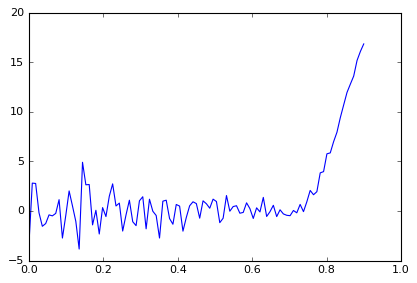

In [30]:
plt.plot(lamVec/lam_max,UETPmu - ETPmu);

Plot the curves for $\mathbb{E}[\langle S_\lambda(z), z \rangle \mid \mathcal{A}]$ and $\mathbb{E}[\langle S_\lambda(z), z \rangle]$

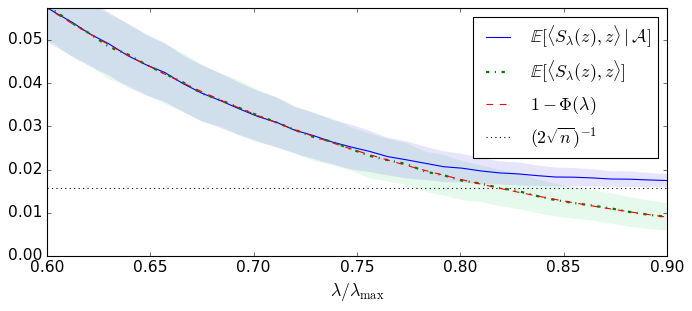

In [73]:
plt.figure(figsize=(10,4));

plt.fill_between(lamVec/lam_max, (ETPmu - np.sqrt(ETPvar))/(2*n), (ETPmu + np.sqrt(ETPvar))/(2*n), color=(0, .8, .3, .1), lw=0);
plt.fill_between(lamVec/lam_max, (UETPmu - np.sqrt(UETPvar))/(2*n), (UETPmu + np.sqrt(UETPvar))/(2*n), color=(.1, 0, .9, .1), lw=0);
plt.plot(lamVec/lam_max, UETPmu/(2*n),
         label='$\\mathbb{E}[\\langle S_\\lambda(z), z\\rangle \\mid \\mathcal{A}]$')
plt.plot(lamVec/lam_max, ETPmu/(2*n), 'g-.', lw=2,
         label='$\\mathbb{E}[\\langle S_\\lambda(z), z\\rangle]$')
plt.plot(lamVec/lam_max, 1 - norm.cdf(lamVec), 'r--', lw=1, label='$1-\\Phi(\\lambda)$');
plt.hlines(.5/np.sqrt(n), 0, rho, colors='k', linestyles='dotted', label='$(2\\sqrt{n})^{-1}$');
plt.xlabel('$\\lambda / \\lambda_{\\max}$', size=16);
plt.xlim(rho-rho/3, rho);
plt.ylim(0, 1-norm.cdf(lam_max * (rho-rho/3)));
plt.legend(fontsize=16);
plt.xticks(size=14);
plt.yticks(size=14);

In [60]:
(np.abs((UETPmu/(2*n)) - (1-norm.cdf(lamVec)))).sum()/lamVec.size

0.00039257674468780416

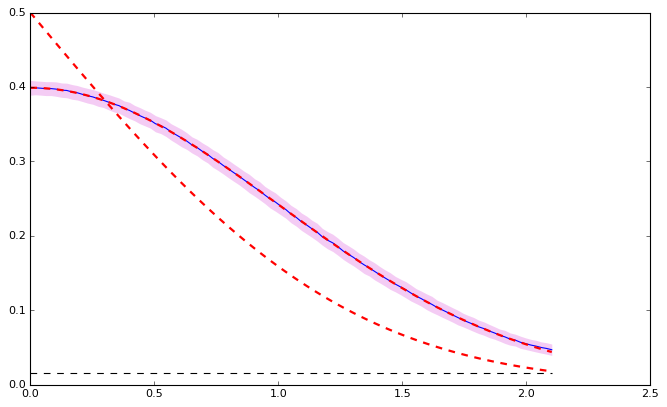

In [84]:
plt.figure(figsize=(10,6))
plt.fill_between(lamVec, (UEUONmu - np.sqrt(UEUONvar))/(2*n), (UEUONmu + np.sqrt(UEUONvar))/(2*n), color=(.8, 0, .8, .2), lw=0);
plt.plot(lamVec, UEUONmu/(2*n))
plt.plot(lamVec, norm.pdf(lamVec), 'r--', lw=2);
plt.plot(lamVec, 1 - norm.cdf(lamVec), 'r--', lw=2);
plt.hlines(.5/np.sqrt(n), lamVec[0], lamVec[-1], colors='k', linestyles='dashed');
#plt.axis('image');
#plt.yscale('log');
#plt.ylim(.1, .5);

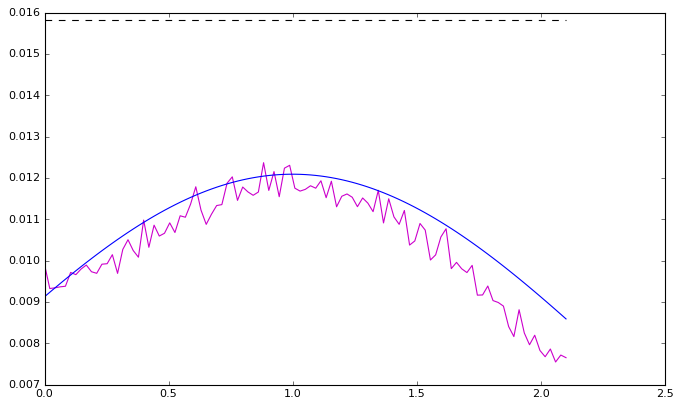

In [98]:
plt.figure(figsize=(10,6))
plt.plot(lamVec, np.sqrt(UEUONvar)/(2*n), color=(.8, 0, .8, 1));
plt.plot(lamVec, norm.pdf(.75*(lamVec-1))/33);
plt.hlines(.5/np.sqrt(n), lamVec[0], lamVec[-1], colors='k', linestyles='dashed');
#plt.axis('image');
#plt.yscale('log');
#plt.ylim(.1, .5);